### Imports


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
import matplotlib.cm as cm


### Data load


In [16]:
# Load dataset
df = pd.read_csv("data/insta.csv")

### Feature Selection and Standardization


In [17]:
# Select features for clustering
X = df[['Instagram visit score', 'Spending_rank(0 to 100)']]

# Standardize features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Compute Silhouette scores


In [18]:
# Range of cluster numbers to evaluate
k_values = range(2, 10)
silhouette_scores = []

# Compute silhouette score for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

### Find optimal k and fit model


In [19]:
# Find the optimal k (highest silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters based on silhouette score: {optimal_k}")

# Fit K-Means with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_optimal.fit_predict(X_scaled)
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
silhouette_values = silhouette_samples(X_scaled, cluster_labels)

Optimal number of clusters based on silhouette score: 4


### Silhouette plot


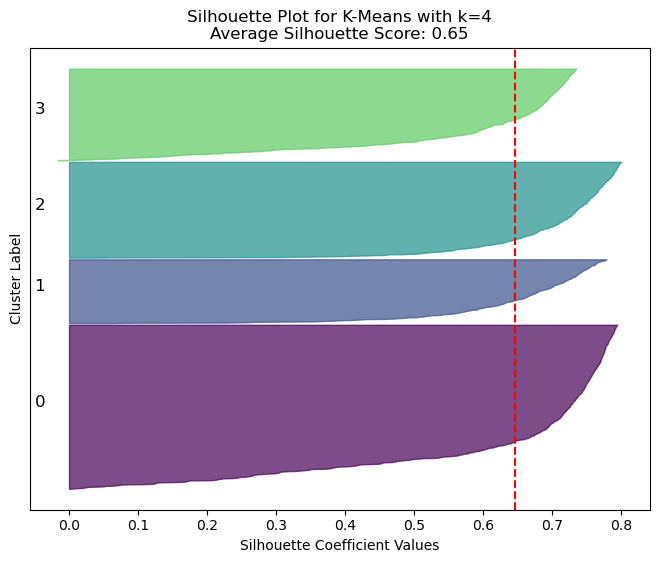

In [20]:
# Silhouette plot
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10
for i in range(optimal_k):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.viridis(float(i) / optimal_k)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i), fontsize=12)
    y_lower = y_upper + 10

ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Cluster Label")
ax.set_title(f"Silhouette Plot for K-Means with k={optimal_k}\nAverage Silhouette Score: {silhouette_avg:.2f}")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
plt.show()



### Visualizing best clusters


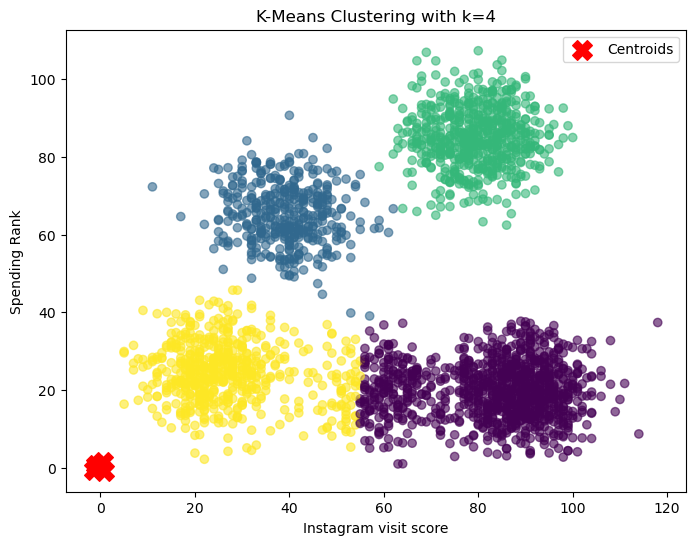

In [21]:
# Scatter plot of clusters
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap="viridis", alpha=0.6)
plt.scatter(kmeans_optimal.cluster_centers_[:, 0], kmeans_optimal.cluster_centers_[:, 1], s=200, c="red", marker="X", label="Centroids")
plt.xlabel("Instagram visit score")
plt.ylabel("Spending Rank")
plt.title(f"K-Means Clustering with k={optimal_k}")
plt.legend()
plt.show()